# Batting Stats in IPL

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, glob, yaml, pickle
import datetime

from utils import get_player_profile

In [2]:
player='SK Raina'
get_player_profile(player)

,season,Innings,NO,Runs,BF,HS,Ave,SR,50s,100s,4s,6s
0,2008,14,3,421,295,55,38.27,142.71,3,0,35,18
1,2009,14,0,434,308,98,31.00,140.91,2,0,37,21
2,2010,16,5,513,356,83,46.64,144.10,4,0,45,22
3,2011,16,2,438,325,73,31.29,134.77,4,0,36,17
4,2012,18,1,441,325,73,25.94,135.69,1,0,36,19
5,2013,17,4,548,365,100,42.15,150.14,4,1,50,18
6,2014,16,3,523,359,87,40.23,145.68,5,0,51,19
7,2015,17,2,374,304,62,24.93,123.03,2,0,31,16
8,2016,15,1,399,312,75,28.50,127.88,3,0,39,10
9,2017,14,3,442,307,84,40.18,143.97,3,0,42,13


In [3]:
df=pickle.load(open('./database/scorecard_all.df', 'rb'))
df.head(2)

,batsman,0,1,2,3,4,5,6,Runs,BF,NO,Team,Against,Win,Toss,team-total,season,date,match-id,SR
0,SC Ganguly,8,2,0,0,2,0,0,10,12,False,Kolkata Knight Riders,Royal Challengers Bangalore,True,False,222,2008,2008-04-18,335982,82.6446
1,BB McCullum,23,22,9,0,10,0,13,158,73,True,Kolkata Knight Riders,Royal Challengers Bangalore,True,False,222,2008,2008-04-18,335982,216.142


In [4]:
def summary_():
    df=pickle.load(open('./database/scorecard_all.df', 'rb'))
    all_players = df['batsman'].unique()
    
    data=[]
    for player in all_players:
        dfp = df[ df['batsman']==player ]
        
        Inns_ = dfp.shape[0]
        Runs_ = dfp.Runs.sum()
        BF_   = dfp.BF.sum()
        NOs_  = dfp.NO.sum()
        
        HS    = max(dfp.Runs)
        Fifty = ((dfp.Runs>=50) & (dfp.Runs<100) ).sum()
        Hundred = (dfp.Runs>=100).sum()
        
        Wins  = sum(dfp.Win)
        Toss_wins = sum(dfp.Toss)
        
        SR    = np.round(100*Runs_/(BF_+0.1), 2) # add 0.1 to avoide deviding by 0
        
        if Inns_== NOs_:
            Ave=dfp.Runs.sum() 
        else:
            Ave   = np.round(Runs_/(Inns_-NOs_), 2)
        Fours = dfp['4'].sum()
        Sixes = dfp['6'].sum()

        data.append([player, Inns_, NOs_, Runs_, BF_, HS, Ave, SR, Fifty, Hundred, Fours, Sixes] )
    df_p = pd.DataFrame(data, columns=['player', 'Innings', 'NO', 'Runs', 'BF', 'HS',
                                       'Ave','SR', '50s', '100s', '4s', '6s'])
    return df_p

df_summary= summary_()
df_summary.head(2)

,player,Innings,NO,Runs,BF,HS,Ave,SR,50s,100s,4s,6s
0,SC Ganguly,56,3,1349,1263,91,25.45,106.80,7,0,137,42
1,BB McCullum,109,7,2873,2177,158,28.17,131.96,13,2,292,130


## Top players in terms of Runs, 50s, 100s, 4s, 6s and so on

In [5]:
def sorted_table(sort_by='Runs', min_runs=2000, min_balls=1500):
    df_summary = summary_()
    df_summary = df_summary[ (df_summary['Runs']>=min_runs) & (df_summary['BF']>=min_balls) ]
    df_sorted  = df_summary.sort_values(by=[sort_by], ascending=False)
    return df_sorted

In [17]:
def get_top_players():
    sorting_list=['Innings', 'NO', 'Runs', 'BF', 'HS','Ave', 'SR', '50s', '100s', '4s', '6s']
    for sort_item in sorting_list:
        df_sorted = sorted_table(sort_by=sort_item)
        print ('Sorted by :',sort_item)
        display(df_sorted[:5])
#get_top_players()

## Consistency and Average
count the 30+ score for each batsman

In [7]:
df=pickle.load(open('./database/scorecard_all.df', 'rb'))
df.head(2)

,batsman,0,1,2,3,4,5,6,Runs,BF,NO,Team,Against,Win,Toss,team-total,season,date,match-id,SR
0,SC Ganguly,8,2,0,0,2,0,0,10,12,False,Kolkata Knight Riders,Royal Challengers Bangalore,True,False,222,2008,2008-04-18,335982,82.6446
1,BB McCullum,23,22,9,0,10,0,13,158,73,True,Kolkata Knight Riders,Royal Challengers Bangalore,True,False,222,2008,2008-04-18,335982,216.142


In [8]:
def consistency_(th_runs=30):
    df=pickle.load(open('./database/scorecard_all.df', 'rb'))
    all_players = df['batsman'].unique()
    
    data=[]
    for player in all_players:
        dfp     = df[ df['batsman'] == player ]
        Inns_   = dfp.shape[0]
        Runs_   = dfp.Runs.sum()
        BF_     = dfp.BF.sum()
        Inns_th = dfp[dfp['Runs'] >= th_runs].shape[0]
        
        if (Runs_ > 3000):
            th_plus = dfp[dfp['Runs'] >= th_runs]['Runs'].shape[0]
            Runs_th = dfp[dfp['Runs'] >= th_runs]['Runs'].sum()

            mu_R      = np.mean(dfp['Runs'])
            sigma_R   = np.std(dfp['Runs'])
            sigma_mu_R= sigma_R/mu_R

            mu_B      = np.mean(dfp['BF'])
            sigma_B   = np.std(dfp['BF'])
            sigma_mu_B= sigma_B/mu_B
            
            RpI     = Runs_/Inns_ 
            BpI     = BF_/Inns_
            data.append([player, Inns_, Inns_th, Runs_, Runs_th, BF_, th_plus, RpI, BpI, mu_R, sigma_R, sigma_mu_R,
                         mu_B, sigma_B, sigma_mu_B])

    df_ = pd.DataFrame( data, columns=[ 'player', 'Innings', 'Innings_th', 'Runs', 'Runs_th', 'BF',
                                       'Th_plus', 'RpI', 'BpI', 'mu_R', 'sigma_R', 'sigma_ov_mu_R',
                                       'mu_B', 'sigma_B', 'sigma_ov_mu_B' ])
    df_['name_and_thplus'] = df_['player']+" ("+df_['Th_plus'].astype(str)+")"
    df_sorted  = df_.sort_values(by=['RpI'], ascending=False)

    return df_sorted

consistency_().head(2)

,player,Innings,Innings_th,Runs,Runs_th,BF,Th_plus,RpI,BpI,mu_R,sigma_R,sigma_ov_mu_R,mu_B,sigma_B,sigma_ov_mu_B,name_and_thplus
13,DA Warner,134,72,4975,4343,3526,72,37.126866,26.313433,37.126866,29.705375,0.800105,26.313433,17.807603,0.67675,DA Warner (72)
12,CH Gayle,125,55,4507,3693,2981,55,36.056000,23.848000,36.056000,33.967114,0.942066,23.848000,17.963989,0.75327,CH Gayle (55)


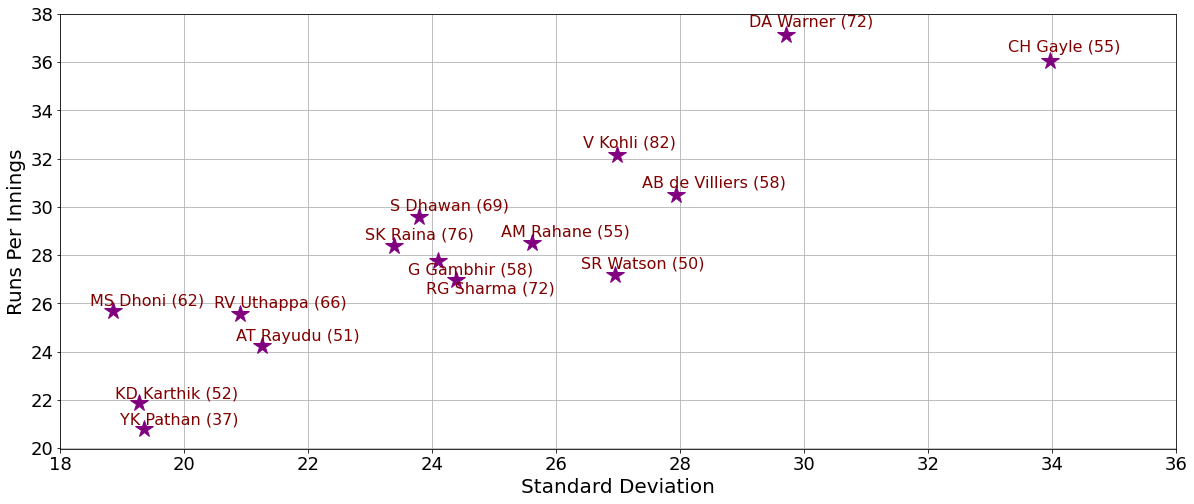

In [9]:
def Plot_avg_rpi():
    df_c=consistency_(th_runs=30)
    plt.figure(figsize=(20, 8))
    plt.plot(df_c['sigma_R'], df_c['RpI'], '*', markersize=18, color='purple')
    for i in range(df_c.shape[0]):
        if (df_c.player[i] == 'RG Sharma') or (df_c.player[i] == 'G Gambhir') :
            plt.text(0.98*df_c['sigma_R'][i], 0.98*df_c['RpI'][i], df_c['name_and_thplus'][i], fontsize=16, color='maroon')
        else:
            plt.text(0.98*df_c['sigma_R'][i], 1.01*df_c['RpI'][i], df_c['name_and_thplus'][i], fontsize=16, color='maroon')

    plt.xticks([18, 20, 22, 24, 26, 28, 30, 32, 34, 36], fontsize=18);
    plt.yticks([20, 22, 24, 26, 28, 30, 32, 34, 36, 38], fontsize=18);
    plt.xlabel('Standard Deviation', fontsize=20)
    plt.ylabel('Runs Per Innings',   fontsize=20)
    plt.grid()
Plot_avg_rpi()

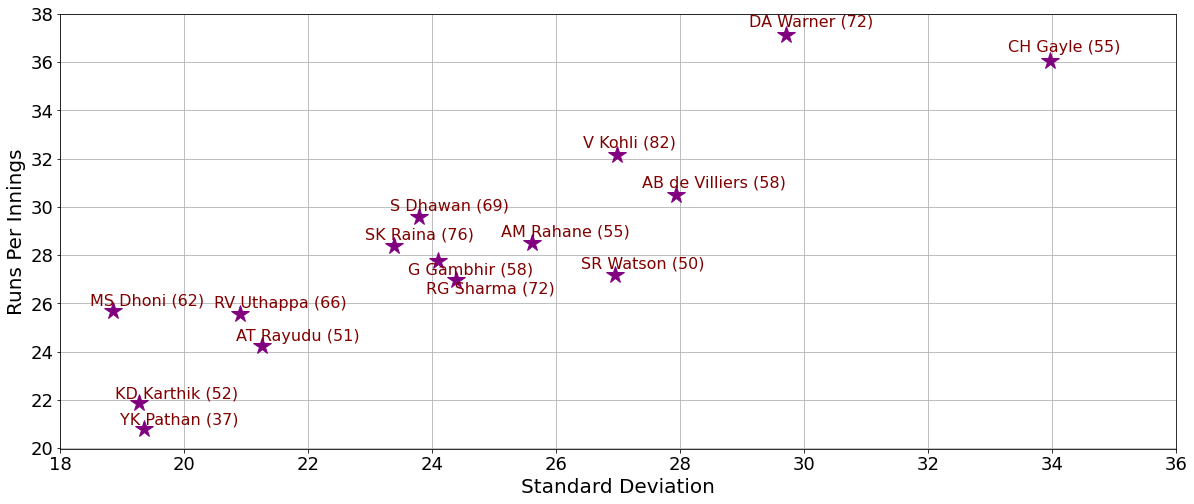

In [10]:
def Plot_avg_bpi():
    df_c=consistency_(th_runs=30)
    plt.figure(figsize=(20, 8))
    plt.plot(df_c['sigma_B'], df_c['BpI'], '*', markersize=18, color='purple')
    for i in range(df_c.shape[0]):
        plt.text(0.98*df_c['sigma_B'][i], 0.98*df_c['BpI'][i], df_c['player'][i], fontsize=16, color='maroon')
    plt.xticks([18, 20, 22, 24, 26, 28, 30, 32, 34, 36], fontsize=18);
    plt.yticks([20, 22, 24, 26, 28, 30, 32, 34, 36, 38], fontsize=18);
    plt.xlabel('Standard Deviation', fontsize=20)
    plt.ylabel('Balls Per Innings',   fontsize=20)
    plt.grid()
Plot_avg_rpi()

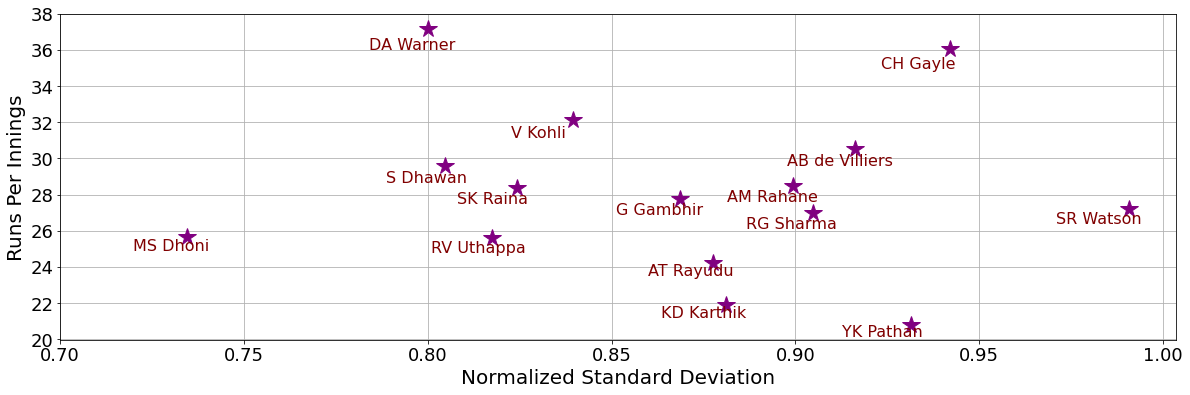

In [13]:
def Plot_sigma_mu():
    df_c=consistency_(th_runs=30)
    plt.figure(figsize=(20, 6))
    plt.plot(df_c['sigma_ov_mu_R'], df_c['mu_R'], '*', markersize=18, color='purple')
    for i in range(df_c.shape[0]):
        plt.text(0.98*df_c['sigma_ov_mu_R'][i], 0.97*df_c['mu_R'][i], df_c['player'][i], fontsize=16, color='maroon')
    plt.xticks([0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0], fontsize=18);
    plt.yticks([20, 22, 24, 26, 28, 30, 32, 34, 36, 38], fontsize=18);
    plt.xlabel('Normalized Standard Deviation', fontsize=20)
    plt.ylabel('Runs Per Innings',   fontsize=20)
    plt.grid()
Plot_sigma_mu()

In [22]:
player='SK Raina'
dfs=get_player_profile(player)
dfs

,season,Innings,NO,Runs,BF,HS,Ave,SR,50s,100s,4s,6s
0,2008,14,3,421,295,55,38.27,142.71,3,0,35,18
1,2009,14,0,434,308,98,31.00,140.91,2,0,37,21
2,2010,16,5,513,356,83,46.64,144.10,4,0,45,22
3,2011,16,2,438,325,73,31.29,134.77,4,0,36,17
4,2012,18,1,441,325,73,25.94,135.69,1,0,36,19
5,2013,17,4,548,365,100,42.15,150.14,4,1,50,18
6,2014,16,3,523,359,87,40.23,145.68,5,0,51,19
7,2015,17,2,374,304,62,24.93,123.03,2,0,31,16
8,2016,15,1,399,312,75,28.50,127.88,3,0,39,10
9,2017,14,3,442,307,84,40.18,143.97,3,0,42,13
